In [1]:
import yfinance as yf
from datetime import date,datetime,timedelta
from empyrical import alpha_beta
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import discrete_allocation
from pypfopt.cla import CLA
from pypfopt import discrete_allocation
import pypfopt.plotting as pplt
# import matplotlib as pyplot
from matplotlib.ticker import FuncFormatter
import numpy as np
import pandas as pd

In [1]:
# Import ticker list for S&P500

import yahoo_fin.stock_info as si

tickers = si.tickers_dow()
tickers

['AAPL',
 'AMGN',
 'AXP',
 'BA',
 'CAT',
 'CRM',
 'CSCO',
 'CVX',
 'DIS',
 'DOW',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'KO',
 'MCD',
 'MMM',
 'MRK',
 'MSFT',
 'NKE',
 'PG',
 'TRV',
 'UNH',
 'V',
 'VZ',
 'WBA',
 'WMT']

In [3]:
thelen = len(tickers)

price_data = []

for ticker in tickers:
    start_date1 = date.today()-timedelta(days=(500))
    prices = yf.download(ticker, start = start_date1)
    price_data.append(prices.assign(ticker=ticker)[['Adj Close']])

df_stocks = pd.concat(price_data, axis=1)
df_stocks.columns=tickers
df_stocks.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-19,80.146545,215.376068,133.770798,338.299988,132.482697,192.869995,44.092644,103.284492,141.300003,43.769421,...,74.535210,184.968872,101.082893,121.627335,129.477417,298.211243,211.675507,55.170254,49.402943,114.815613
2020-02-20,79.324333,214.583969,133.428894,336.279999,132.550476,193.360001,44.626053,102.417107,140.369995,44.873775,...,74.980606,182.144180,101.151947,122.732689,128.967255,295.105164,209.829773,55.047066,49.213188,114.825378
2020-02-21,77.528809,215.211838,131.787643,330.380005,132.821533,189.500000,44.102165,101.670975,138.970001,44.450439,...,74.844254,176.386124,98.902603,122.849030,130.103119,294.421448,207.209991,55.151302,48.814705,115.693718
2020-02-24,73.846161,210.468887,125.232452,317.899994,127.942711,185.940002,41.911346,97.660461,133.009995,42.554626,...,73.926201,168.781143,94.620934,119.552376,129.102020,271.331085,197.266769,54.952305,46.518654,113.488724
2020-02-25,71.344841,203.223984,118.110626,304.140015,124.874100,181.270004,40.711159,93.929756,128.190002,40.447140,...,72.962700,165.995956,91.651390,117.739204,125.896606,257.265930,186.956390,54.127872,45.076511,111.605698


In [4]:
#Checking if any NaN values in the data
nullin_df = pd.DataFrame(df_stocks,columns=tickers)
print(nullin_df.isnull().sum())

AAPL    0
AMGN    0
AXP     0
BA      0
CAT     0
CRM     0
CSCO    0
CVX     0
DIS     0
DOW     0
GS      0
HD      0
HON     0
IBM     0
INTC    0
JNJ     0
JPM     0
KO      0
MCD     0
MMM     0
MRK     0
MSFT    0
NKE     0
PG      0
TRV     0
UNH     0
V       0
VZ      0
WBA     0
WMT     0
dtype: int64


In [5]:
#Annualized Return
mu = expected_returns.mean_historical_return(df_stocks)
#Sample Variance of Portfolio
Sigma = risk_models.sample_cov(df_stocks)

In [6]:
#Max Sharpe Ratio - Tangent to the EF
ef = EfficientFrontier(mu, Sigma, weight_bounds=(-1,1)) #weight bounds in negative allows shorting of stocks
sharpe_pfolio=ef.max_sharpe() #May use add objective to ensure minimum zero weighting to individual stocks
sharpe_pwt=ef.clean_weights()
print(sharpe_pwt)

OrderedDict([('AAPL', 0.9255), ('AMGN', -0.38445), ('AXP', 0.39729), ('BA', -0.51711), ('CAT', 1.0), ('CRM', -0.18305), ('CSCO', -0.07823), ('CVX', -0.35574), ('DIS', 0.04817), ('DOW', 0.06571), ('GS', 1.0), ('HD', 0.44595), ('HON', 0.65598), ('IBM', -0.26207), ('INTC', -0.7992), ('JNJ', 1.0), ('JPM', -0.82906), ('KO', -0.75868), ('MCD', -0.68554), ('MMM', 0.07294), ('MRK', -0.27302), ('MSFT', 0.91898), ('NKE', 0.72463), ('PG', -0.75791), ('TRV', 0.36118), ('UNH', 0.05416), ('V', -1.0), ('VZ', 0.03916), ('WBA', -0.30169), ('WMT', 0.47611)])


In [7]:
# 2year risk free rate - Treasury Yield 
ef.portfolio_performance(verbose=True)

Expected annual return: 233.3%
Annual volatility: 74.3%
Sharpe Ratio: 3.11


(2.3329981244265285, 0.7431507929060126, 3.1124209871078707)

In [8]:
# #  Market neutral portfolios (with weights summing to zero)
# from pypfopt.expected_returns import mean_historical_return
# from pypfopt.risk_models import CovarianceShrinkage


# mu = mean_historical_return(df_stocks)
# S = CovarianceShrinkage(df_stocks).ledoit_wolf()
# ef = EfficientFrontier(mu, S, weight_bounds=(-1,1))
# ef.efficient_return(target_return=0.2, market_neutral=True)

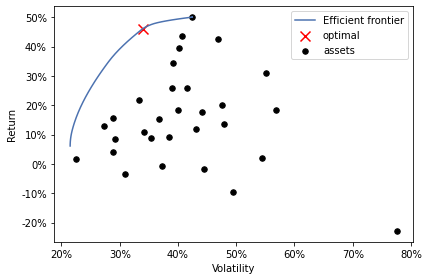

In [9]:
cl_obj = CLA(mu, Sigma)
ax = pplt.plot_efficient_frontier(cl_obj, showfig = False)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

In [10]:
#Min Volatility Portfolio
ef1 = EfficientFrontier(mu, Sigma, weight_bounds=(0,1)) #weight bounds in negative allows shorting of stocks
minvol=ef1.min_volatility()
minvol_pwt=ef1.clean_weights()
print(minvol_pwt)

OrderedDict([('AAPL', 0.0), ('AMGN', 0.0), ('AXP', 0.0), ('BA', 0.0), ('CAT', 0.0), ('CRM', 0.0), ('CSCO', 0.0), ('CVX', 0.0), ('DIS', 0.0), ('DOW', 0.0), ('GS', 0.0), ('HD', 0.0), ('HON', 0.0), ('IBM', 0.0), ('INTC', 0.0), ('JNJ', 0.05181), ('JPM', 0.0), ('KO', 0.0), ('MCD', 0.05844), ('MMM', 0.02217), ('MRK', 0.06488), ('MSFT', 0.0), ('NKE', 0.0025), ('PG', 0.0), ('TRV', 0.0), ('UNH', 0.0), ('V', 0.0), ('VZ', 0.60157), ('WBA', 0.0), ('WMT', 0.19864)])


In [11]:
# 2year risk free rate - Treasury Yield 
ef1.portfolio_performance(verbose=True)

Expected annual return: 6.1%
Annual volatility: 21.5%
Sharpe Ratio: 0.19


(0.06122083270781571, 0.21488424040381635, 0.19182808674266846)

In [12]:
# Allocate Portfolio Value in $ as required to show number of shares to buy, also bounds for shorting will affect allocation
latest_prices = discrete_allocation.get_latest_prices(df_stocks)

#Min Volatility Portfolio Allocation $10000
allocation_minv, rem_minv = discrete_allocation.DiscreteAllocation(minvol_pwt, latest_prices, total_portfolio_value=100000).lp_portfolio()
print(allocation_minv)
print("Leftover Fund value in$ after building minimum volatility portfolio is ${:.2f}".format(rem_minv))

{'JNJ': 31, 'MCD': 25, 'MMM': 11, 'MRK': 82, 'NKE': 1, 'VZ': 1067, 'WMT': 142}
Leftover Fund value in$ after building minimum volatility portfolio is $0.04


In [13]:
#Max Sharpe Ratio Portfolio Allocation $10000
latest_prices1 = discrete_allocation.get_latest_prices(df_stocks)
allocation_shp, rem_shp = discrete_allocation.DiscreteAllocation(sharpe_pwt, latest_prices1, total_portfolio_value=100000).lp_portfolio() 
print(allocation_shp)
print("Leftover Fund value in$ after building Max Sharpe ratio portfolio is ${:.2f}".format(rem_shp))

{'AAPL': 81, 'AXP': 29, 'CAT': 56, 'DIS': 3, 'DOW': 13, 'GS': 33, 'HD': 17, 'HON': 36, 'JNJ': 72, 'MMM': 4, 'MSFT': 40, 'NKE': 55, 'TRV': 29, 'UNH': 2, 'VZ': 8, 'WMT': 42, 'AMGN': -155, 'BA': -218, 'CRM': -74, 'CSCO': -146, 'CVX': -335, 'IBM': -187, 'INTC': -1408, 'JPM': -532, 'KO': -1400, 'MCD': -293, 'MRK': -347, 'PG': -558, 'V': -419, 'WBA': -627}
Leftover Fund value in$ after building Max Sharpe ratio portfolio is $29.02
